Lasso and Ridge Regression

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data_cali = fetch_california_housing()

In [8]:
data_pd = pd.DataFrame(data_cali.data)
data_pd.columns = data_cali.feature_names
data_pd_target = np.asarray(data_cali.target)
data_pd['House Price'] = pd.Series(data_pd_target)

#input
X = data_pd.iloc[:, :-1]

#output
Y = data_pd.iloc[:, -1]

#X = data_pd.drop(columns='HousePrice')
#y = data_pd['HousePrice']

print(data_pd.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  House Price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    data_pd.iloc[:, :-1], 
    data_pd.iloc[:, -1],    
    test_size=0.2,
    random_state=42
)

print('Training data shape X = %s and Y = %s' % (x_train.shape, y_train.shape))
print('Testing data shape X = %s and Y = %s' % (x_test.shape, y_test.shape))

Training data shape X = (16512, 8) and Y = (16512,)
Testing data shape X = (4128, 8) and Y = (4128,)


In [12]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

lreg_y_pred = lreg.predict(x_test)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print('Mean Squared Error on test set : ', mean_squared_error)

lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean Squared Error on test set :  0.5558915986952445
      Columns  Coefficient Estimate
0      MedInc              0.448675
1    HouseAge              0.009724
2    AveRooms             -0.123323
3   AveBedrms              0.783145
4  Population             -0.000002
5    AveOccup             -0.003526
6    Latitude             -0.419792
7   Longitude             -0.433708


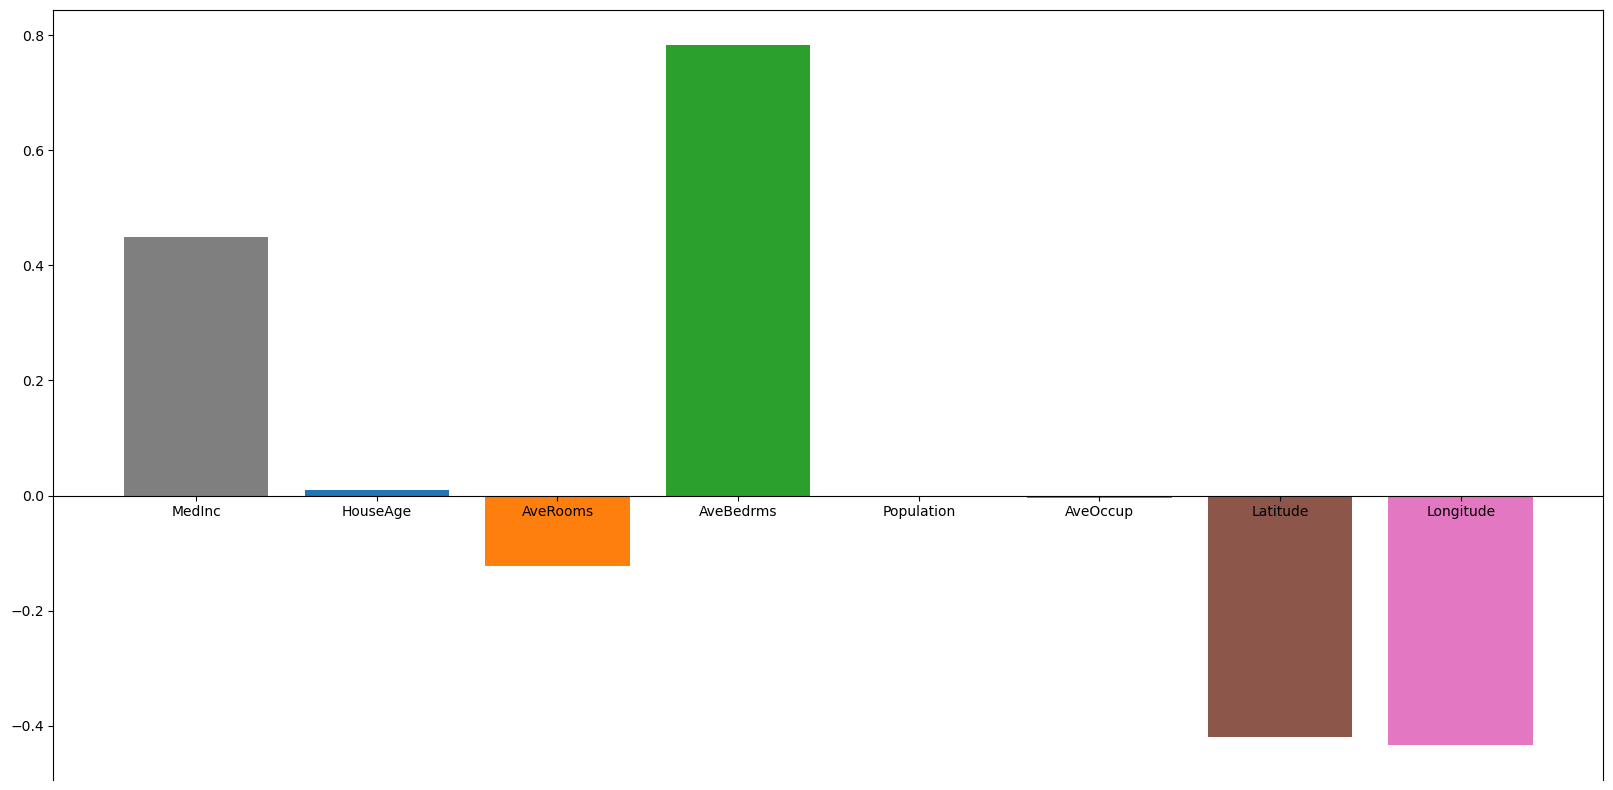

In [14]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(lreg_coefficient['Columns'], lreg_coefficient['Coefficient Estimate'], color = color)
ax.spines["bottom"].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [16]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

#calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test set : ', mean_squared_error_ridge)

#get ridge coefficiant and print them
ridge_coefficiant = pd.DataFrame()
ridge_coefficiant['Columns'] = x_train.columns
ridge_coefficiant["Coefficient Estimate"] = pd.Series(ridgeR.coef_)
print(ridge_coefficiant)

Mean Squared Error on test set :  0.5558034669932211
      Columns  Coefficient Estimate
0      MedInc              0.448511
1    HouseAge              0.009726
2    AveRooms             -0.123014
3   AveBedrms              0.781417
4  Population             -0.000002
5    AveOccup             -0.003526
6    Latitude             -0.419787
7   Longitude             -0.433681


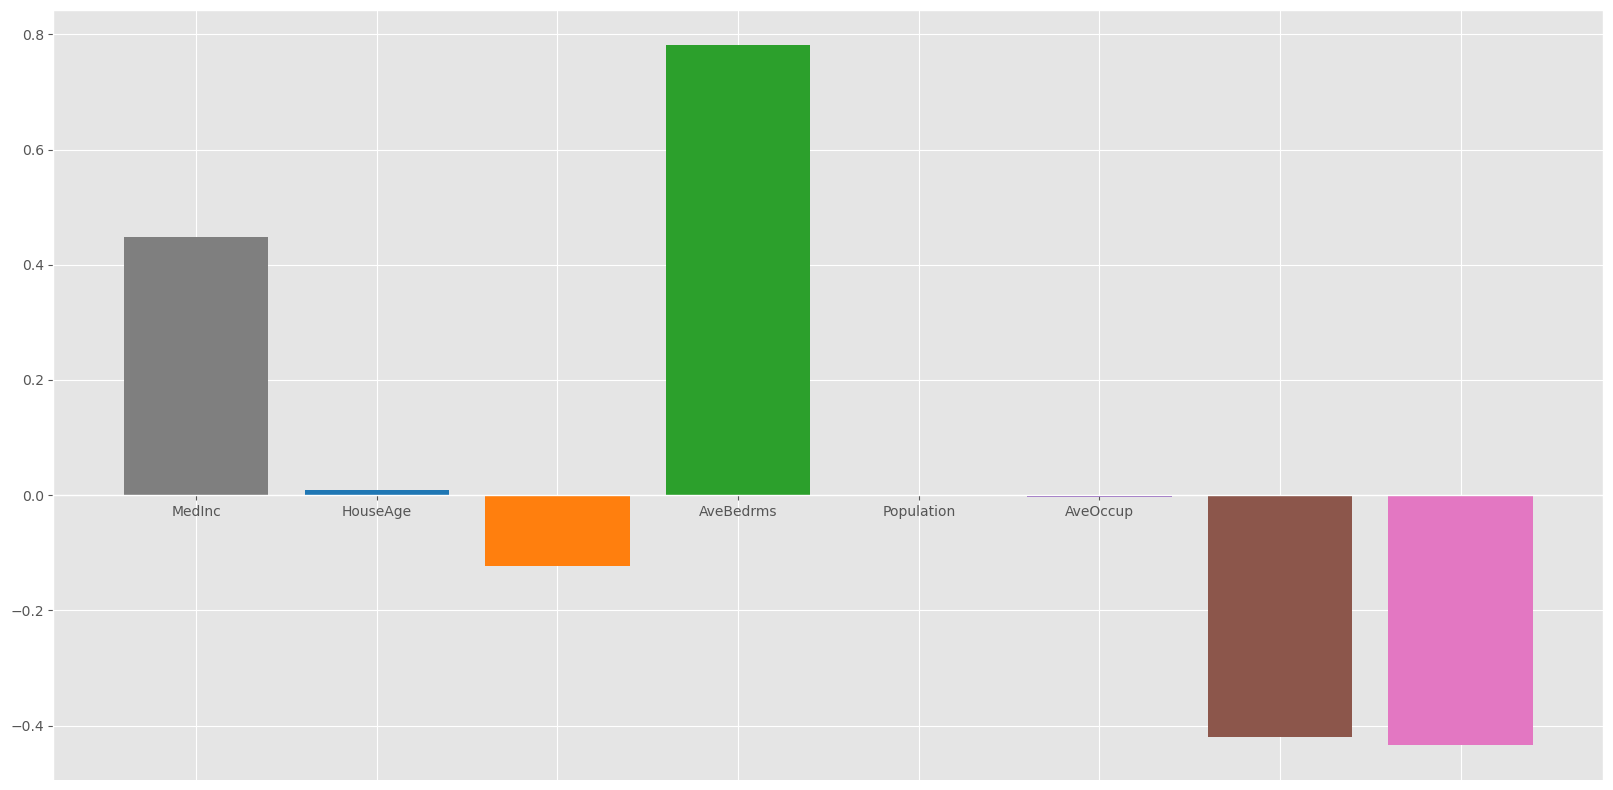

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
ax.bar(ridge_coefficiant['Columns'], ridge_coefficiant['Coefficient Estimate'], color = color)
ax.spines["bottom"].set_position('zero')

plt.style.use('ggplot')
plt.show()

Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

#calculate mean square error
mean_squared_error_lasso = np.mean((y_pred1 - y_test)**2)
print('Mean Squared Error on test set : ', mean_squared_error_lasso)

#get ridge coefficiant and print them
lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = x_train.columns
lasso_coeff["Coefficient Estimate"] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean Squared Error on test set :  0.9380337514945427
      Columns  Coefficient Estimate
0      MedInc              0.148196
1    HouseAge              0.005728
2    AveRooms              0.000000
3   AveBedrms             -0.000000
4  Population             -0.000008
5    AveOccup             -0.000000
6    Latitude             -0.000000
7   Longitude             -0.000000
